# Лабораторная работа №2

## 1.1 Оценки математического ожидания, дисперсии, медианы
Пусть случайная величина $\xi$ имеет распределение, задаваемое плотностью $f_\xi(x) = \theta^2 x e^{-\theta x}$, $x \geqslant 0$. Для каждого $\theta \in \{0.5, 2, 8\}$:  



### 1.
(a) Аналитически вычислить математическое ожидание, дисперсию и математическое ожидание квадрата $\xi$. Привести в отчет.  

(b) Для $k \in \{2^4, 2^5, \dots, 2^{15}\}$ построить выборку из $k$ элементов. Для каждой из них посчитать оценки: математического ожидания, дисперсии и квадрата математического ожидания параметра из варианта. Для каждой из выборок и оценок визуализировать это все на графиках (для каждой оценки — свой график), где по вертикальной оси — оценка, а по горизонтальной — $k$, плюс, добавьте горизонтальную линию, отвечающую за аналитически полученную оценку.

**Решение:**

Случайная величина $\xi$ имеет плотность  

$$
f_\xi(x) = \theta^2 x e^{-\theta x}, \quad x \geqslant 0
$$

Это гамма-распределение с параметрами формы $\alpha = 2$ и масштаба $\beta = 1/\theta$.

**(a)** Для гамма-распределения $\Gamma(2, 1/\theta)$:  

$$
E[\xi] = \frac{2}{\theta}, \quad D(\xi) = \frac{2}{\theta^2}, \quad E[\xi^2] = D(\xi) + (E[\xi])^2 = \frac{2}{\theta^2} + \frac{4}{\theta^2} = \frac{6}{\theta^2}
$$

Таблица для $\theta \in \{0.5, 2, 8\}$:

| $\theta$ | $E[\xi]$ | $D(\xi)$ | $E[\xi^2]$ |
|----------|----------|----------|------------|
| 0.5      | 4.0      | 8.0      | 24.0       |
| 2        | 1.0      | 0.5      | 1.5        |
| 8        | 0.25     | 0.03125  | 0.09375    |



**(b)** Численное моделирование и графики  

Для каждого из размеров выборки (16, 32, 64, ..., 32768) мы:  

Генерируем выборку из $k$ чисел, считаем оценки (среднее, дисперсию, etc.), строим график, где по горизонтали — $k$, по вертикали — оценка.  

Значения $k$ растут в геометрической прогрессии (каждый раз умножаются на 2). Логарифмическая шкала позволяет равномерно разместить эти значения на графике. Поэтому на оси X будут ровные промежутки между 16, 32, 64 и т.д.

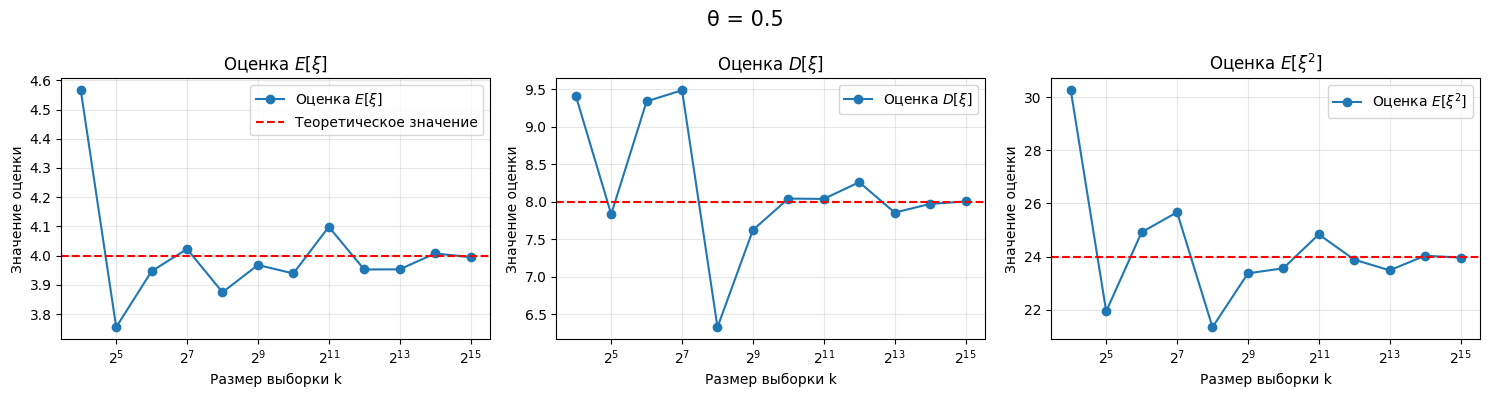

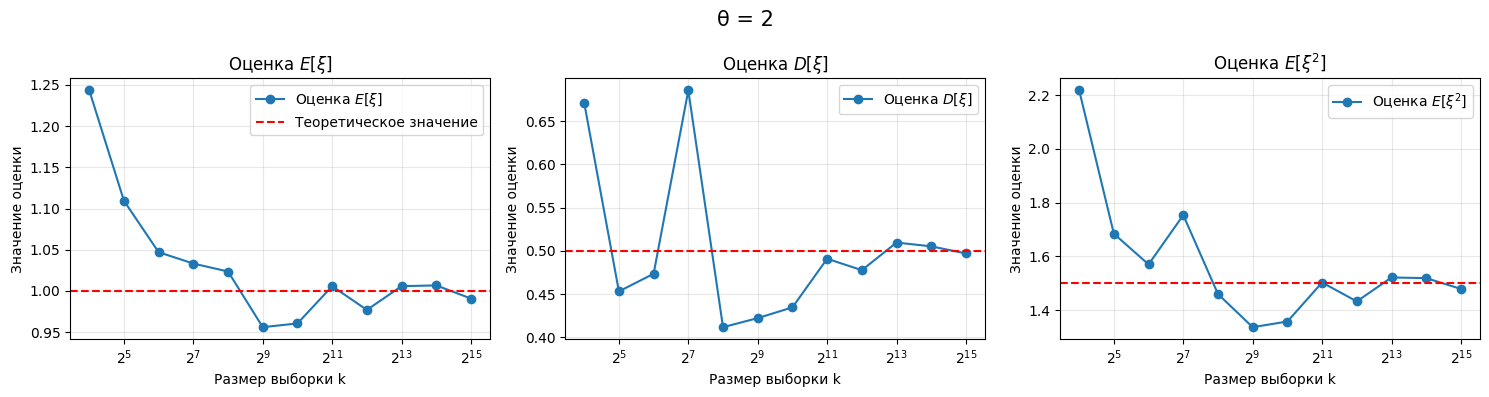

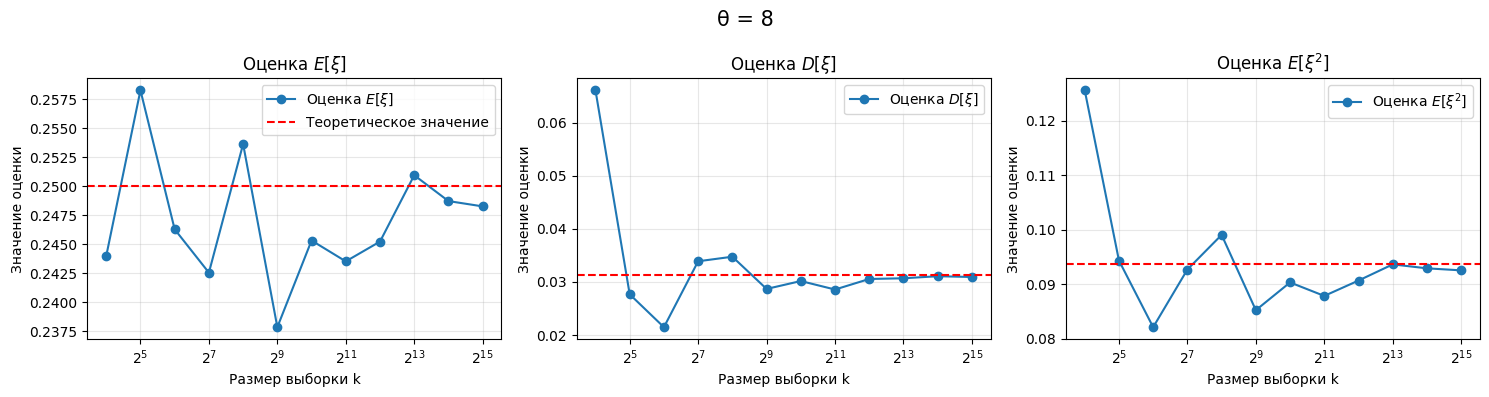

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# параметры
thetas = [0.5, 2, 8]
k_values = [2**i for i in range(4, 16)]  # 2^4 ... 2^15

# аналитические значения
def analytical_values(theta):
    E = 2/theta
    D = 2/theta**2
    E2 = 6/theta**2
    return E, D, E2

# оценка по выборке
def compute_estimates(sample):
    E_hat = np.mean(sample)
    D_hat = np.var(sample, ddof=0)
    E2_hat = np.mean(sample**2)
    return E_hat, D_hat, E2_hat

for theta in thetas:

    # аналитические значения
    E_true, D_true, E2_true = analytical_values(theta)

    est_E, est_D, est_E2 = [], [], []

    # распределение Gamma(k=2, scale=1/theta)
    dist = gamma(a=2, scale=1/theta)

    for k in k_values:
        sample = dist.rvs(size=k)
        E_hat, D_hat, E2_hat = compute_estimates(sample)

        est_E.append(E_hat)
        est_D.append(D_hat)
        est_E2.append(E2_hat)

    plt.figure(figsize=(15, 4))
    plt.suptitle(f'θ = {theta}', fontsize=15)

    # 1. E[X]
    plt.subplot(1, 3, 1)
    plt.plot(k_values, est_E, 'o-', label='Оценка $E[\\xi]$')
    plt.axhline(E_true, color='red', linestyle='--', label='Теоретическое значение')
    plt.xscale('log', base=2)
    plt.xlabel('Размер выборки k')
    plt.ylabel('Значение оценки')
    plt.title('Оценка $E[\\xi]$')
    plt.grid(alpha=0.3)
    plt.legend()

    # 2. D[X]
    plt.subplot(1, 3, 2)
    plt.plot(k_values, est_D, 'o-', label='Оценка $D[\\xi]$')
    plt.axhline(D_true, color='red', linestyle='--')
    plt.xscale('log', base=2)
    plt.xlabel('Размер выборки k')
    plt.ylabel('Значение оценки')
    plt.title('Оценка $D[\\xi]$')
    plt.grid(alpha=0.3)
    plt.legend()

    # 3. E[X^2]
    plt.subplot(1, 3, 3)
    plt.plot(k_values, est_E2, 'o-', label='Оценка $E[\\xi^2]$')
    plt.axhline(E2_true, color='red', linestyle='--')
    plt.xscale('log', base=2)
    plt.xlabel('Размер выборки k')
    plt.ylabel('Значение оценки')
    plt.title('Оценка $E[\\xi^2]$')
    plt.grid(alpha=0.3)
    plt.legend()

    plt.tight_layout()
    plt.show()

**Наблюдения:**  

- С ростом $k$ все оценки сходятся к истинным значениям.  
- При малых $k$ (особенно $k = 16$) разброс оценок велик.  
- При $k \geqslant 2^{11} = 2048$ оценки становятся очень близкими к истинным.  
- Для $\theta = 0.5$ (большое среднее) оценки сходятся медленнее, чем для $\theta = 8$ (малое среднее).

### 2.

Дана плотность распределения случайной величины $\xi$:
$$
f_\xi(x) =
\begin{cases}
\lambda e^{-\lambda (x-a)}, & x \geqslant a \\
0, & \text{else}
\end{cases}
$$

Пусть $(\lambda, a) = (2, 2)$  

(a) Аналитически вычислите значение моды, математического ожидания и медианы.  

(b) Создайте две выборки: одну довольно большого размера (10000 наблюдений, например), а вторую маленькую (например, 20). Постройте оценки моды, математического ожидания и медианы.  

(c) Постройте для первой выборки на одном графике: гистограмму распределения значений из выборки и три вертикальных линии оценок моды, математического ожидания и медианы. Для второй выборки сделайте то же самое. Постройте ещё график рядом для первой выборки, но с функцией распределения плотности и аналитическими значениями мод, математического ожидания и медианы. То же самое, для второй.  

(d) Попробуйте поизменять размер выборки и посмотреть на то, например, сходится ли медиана к математическому ожиданию, или нет.

**Решение:**

**(a) Аналитическое вычисление**

1. **Мода**  
Плотность $f(x) = 2e^{-2(x-2)}$ убывает при $x \geqslant 2$, так как производная:  
$$
f'(x) = -4e^{-2(x-2)} < 0.
$$  
Мода — точка максимума плотности, $a = 2$.

2. **Математическое ожидание:**  
$$
E[\xi] = \int_a^\infty x \cdot \lambda e^{-\lambda(x-a)} \, dx
$$  
Замена $t = x - a$, $x = t + a$, $dx = dt$:  
$$
E[\xi] = \int_0^\infty (t+a) \lambda e^{-\lambda t} \, dt = \int_0^\infty t \lambda e^{-\lambda t} \, dt + a \int_0^\infty \lambda e^{-\lambda t} \, dt = \frac{1}{\lambda} + a = \frac{1}{2} + 2 = 2.5
$$

3. **Медиана**  
Находим $m$ из условия $F(m) = 0.5$, где $F(x) = 1 - e^{-\lambda(x-a)}$:  
$$
1 - e^{-2(m-2)} = 0.5 \Rightarrow e^{-2(m-2)} = 0.5 \Rightarrow -2(m-2) = \ln 0.5 \Rightarrow m - 2 = \frac{\ln 0.5}{-2} = \frac{\ln 2}{2} \approx 0.34657
$$  
$$
m \approx 2.34657
$$

**(b) Создание выборок и оценка**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

lambda_val, a = 2, 2
np.random.seed(42)

# Генерация выборки из экспоненциального распределения со сдвигом
big_sample = np.random.exponential(scale=1/lambda_val, size=10000) + a

# Оценки
big_mode = a  # для убывающей экспоненты мода = a
big_mean = np.mean(big_sample)
big_median = np.median(big_sample)

print("Большая выборка (10000):")
print(f"Оценка моды: {big_mode:.4f}")
print(f"Оценка матожидания: {big_mean:.4f}")
print(f"Оценка медианы: {big_median:.4f}")

print('----------------------------')

small_sample = np.random.exponential(scale=1/lambda_val, size=20) + a

small_mode = a
small_mean = np.mean(small_sample)
small_median = np.median(small_sample)

print("\nМаленькая выборка (20):")
print(f"Оценка моды: {small_mode:.4f}")
print(f"Оценка матожидания: {small_mean:.4f}")
print(f"Оценка медианы: {small_median:.4f}")

Большая выборка (10000):
Оценка моды: 2.0000
Оценка матожидания: 2.4887
Оценка медианы: 2.3392
----------------------------

Маленькая выборка (20):
Оценка моды: 2.0000
Оценка матожидания: 2.4125
Оценка медианы: 2.2788


**(c) Построение графиков**

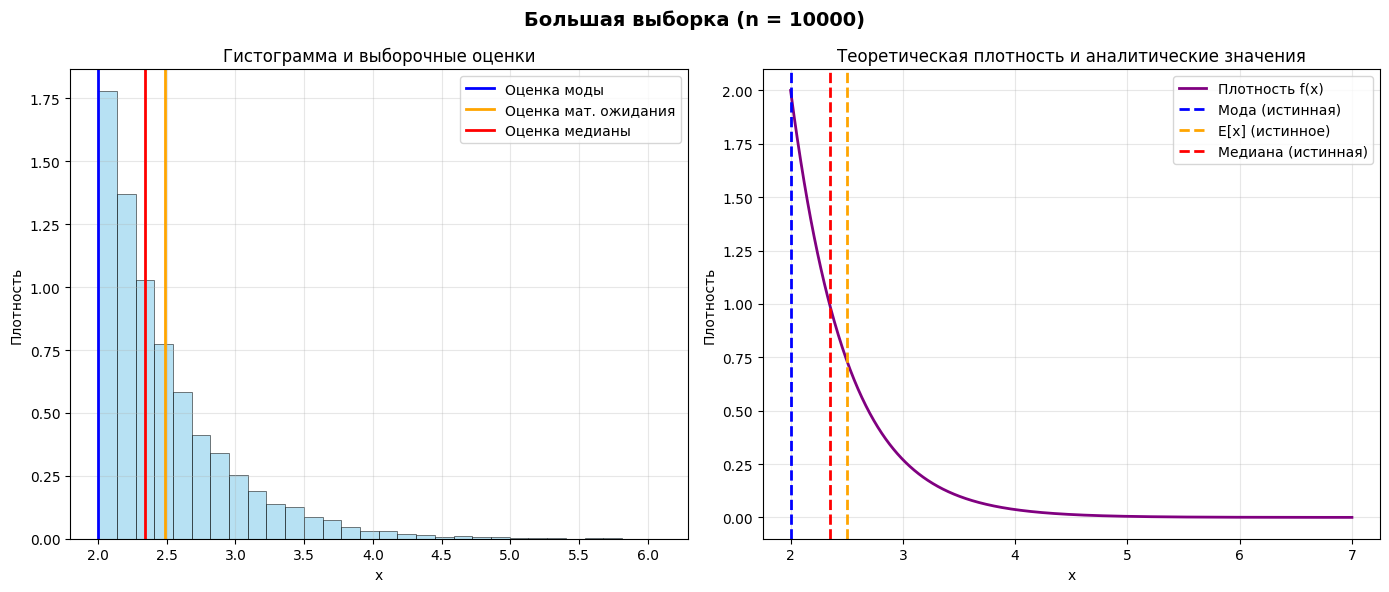

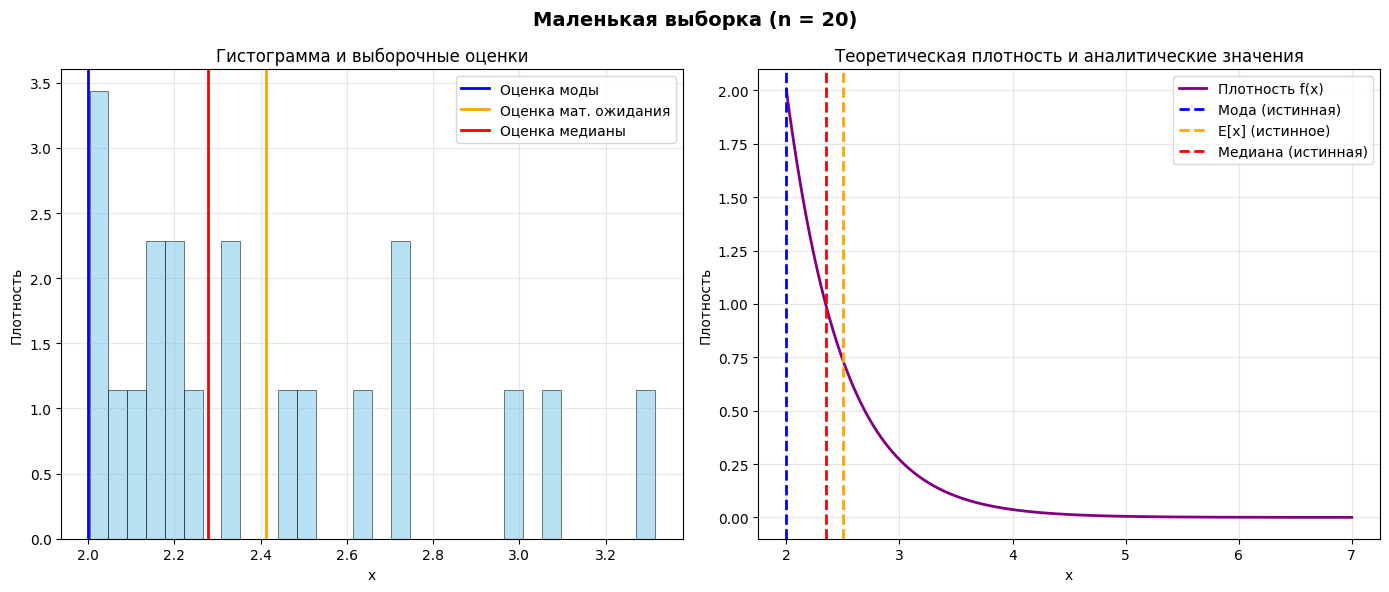

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

lam = 2
a = 2

# аналитические значения
mode_true = a
mean_true = a + 1/lam
median_true = a + np.log(2)/lam

# плотность
def density(x):
    return lam * np.exp(-lam * (x - a))

color_hist = "skyblue"
color_mode = "blue"
color_mean = "orange"
color_median = "red"
color_density = "purple"


def plot_pair(sample, mode_hat, mean_hat, median_hat, title):
    x = np.linspace(a, a + 5, 1000)

    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle(title, fontsize=14, fontweight='bold')

    # гистограмма и выборочные линии
    axs[0].hist(
        sample, bins=30, density=True,
        alpha=0.6, color=color_hist,
        edgecolor="black", linewidth=0.6
    )

    axs[0].axvline(mode_hat,   color=color_mode,   linewidth=2, label='Оценка моды')
    axs[0].axvline(mean_hat,   color=color_mean,   linewidth=2, label='Оценка мат. ожидания')
    axs[0].axvline(median_hat, color=color_median, linewidth=2, label='Оценка медианы')

    axs[0].set_title("Гистограмма и выборочные оценки")
    axs[0].set_xlabel("x")
    axs[0].set_ylabel("Плотность")
    axs[0].grid(alpha=0.3)
    axs[0].legend()

    # плотность и аналитические линии
    axs[1].plot(x, density(x), color=color_density, linewidth=2, label="Плотность f(x)")

    axs[1].axvline(mode_true,   color=color_mode,   linestyle='--', linewidth=2, label="Мода (истинная)")
    axs[1].axvline(mean_true,   color=color_mean,   linestyle='--', linewidth=2, label="E[x] (истинное)")
    axs[1].axvline(median_true, color=color_median, linestyle='--', linewidth=2, label="Медиана (истинная)")

    axs[1].set_title("Теоретическая плотность и аналитические значения")
    axs[1].set_xlabel("x")
    axs[1].set_ylabel("Плотность")
    axs[1].grid(alpha=0.3)
    axs[1].legend()

    plt.tight_layout()
    plt.show()

plot_pair(
    big_sample,
    big_mode, big_mean, big_median,
    "Большая выборка (n = 10000)"
)

plot_pair(
    small_sample,
    small_mode, small_mean, small_median,
    "Маленькая выборка (n = 20)"
)

**(d) Исследование сходимости**

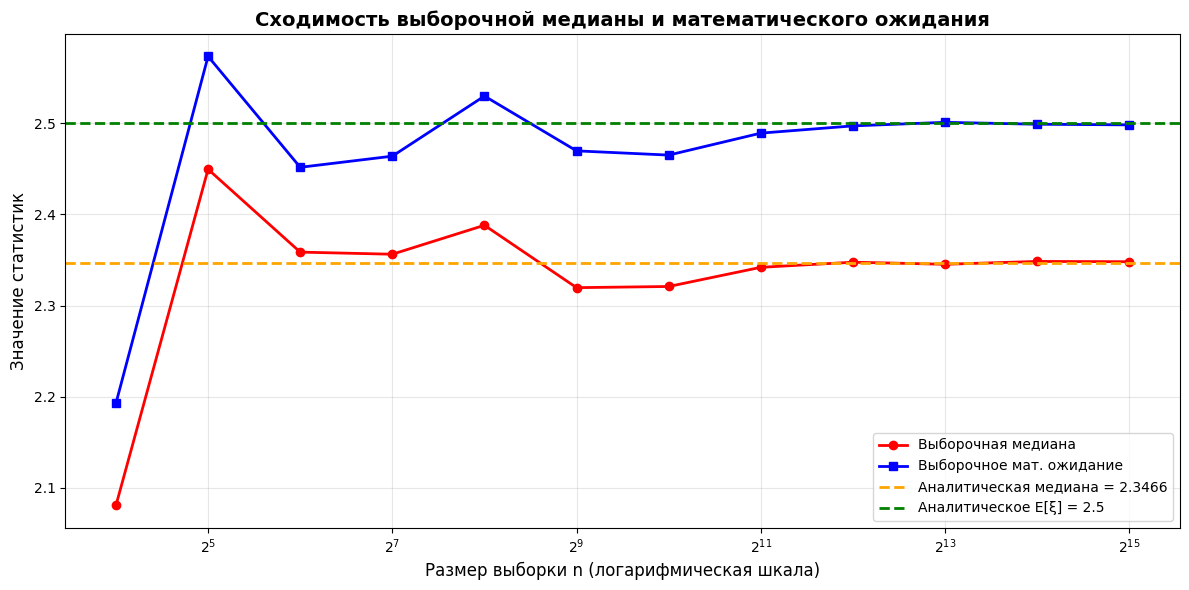

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

lam = 2
a = 2

# аналитические значения
mean_true   = a + 1/lam
median_true = a + np.log(2)/lam

# размеры выборок
n_values = [2**k for k in range(4, 16)]

sample_medians = []
sample_means = []

for n in n_values:
    sample = a + np.random.exponential(scale=1/lam, size=n)
    sample_medians.append(np.median(sample))
    sample_means.append(np.mean(sample))

plt.figure(figsize=(12, 6))

# выборочные оценки
plt.plot(
    n_values, sample_medians, "o-", color="red",
    label="Выборочная медиана", linewidth=2, markersize=6
)
plt.plot(
    n_values, sample_means, "s-", color="blue",
    label="Выборочное мат. ожидание", linewidth=2, markersize=6
)

# аналитические линии
plt.axhline(
    median_true, color="orange", linestyle="--", linewidth=2,
    label=f"Аналитическая медиана = {median_true:.4f}"
)
plt.axhline(
    mean_true, color="green", linestyle="--", linewidth=2,
    label=f"Аналитическое E[ξ] = {mean_true}"
)

plt.xscale("log", base=2)
plt.xlabel("Размер выборки n (логарифмическая шкала)", fontsize=12)
plt.ylabel("Значение статистик", fontsize=12)
plt.title("Сходимость выборочной медианы и математического ожидания", fontsize=14, fontweight="bold")
plt.grid(alpha=0.3)
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

**Медиана** стремится к своей аналитической медиане, а **математическое ожидание** - к своему аналитическому значению.

Так как медиана и среднее различаются для экспоненциального распределения, их выборочные оценки сходятся к разным пределам $\Rightarrow$ они не сходятся.

## 1.2 Моделирование совместного распределения двух СВ

Пусть совместное распределение двух случайных величин задано таблицей  

| $\xi \backslash \eta$ | 1     | 2     | 3     | $\dots$ |
|-----------------------|-------|-------|-------|---------|
| −1                    | $\frac{2}{5} \cdot \frac{1}{2}$ | $\frac{2}{5} \cdot \frac{1}{2^2}$ | $\frac{2}{5} \cdot \frac{1}{2^3}$ | $\dots$ |
| 0                     | $\frac{1}{5} \cdot \frac{1}{2}$ | $\frac{1}{5} \cdot \frac{1}{2^2}$ | $\frac{1}{5} \cdot \frac{1}{2^3}$ | $\dots$ |
| 1                     | $\frac{2}{5} \cdot \frac{1}{2}$ | $\frac{2}{5} \cdot \frac{1}{2^2}$ | $\frac{2}{5} \cdot \frac{1}{2^3}$ | $\dots$ |

где $\eta$ принимает все значения из N. Вычислить корреляционную матрицу аналитически и приближенно (на основе моделирования).


**Аналитическое решение:**

1. Анализ распределения  
Таблица задана как:  

$$
P(\xi=x,\eta=y)=
\begin{cases}
\dfrac{2}{5} \cdot \dfrac{1}{2^y}, & x=-1, y\in\mathbb{N} \\
\dfrac{1}{5} \cdot \dfrac{1}{2^y}, & x=0, y\in\mathbb{N} \\
\dfrac{2}{5} \cdot \dfrac{1}{2^y}, & x=1, y\in\mathbb{N}
\end{cases}
$$

2. Проверка нормировки  
Сумма по всем $y\in\mathbb{N}$:  

$$
\sum_{y=1}^\infty \frac{1}{2^y} = 1 \quad \text{(геометрическая прогрессия)}
$$

Сумма вероятностей:  

$$
P(\xi=-1)= \frac{2}{5} \cdot 1 = \frac{2}{5}
$$

$$
P(\xi=0)= \frac{1}{5} \cdot 1 = \frac{1}{5}
$$

$$
P(\xi=1)= \frac{2}{5} \cdot 1 = \frac{2}{5}
$$

Сумма = 1.

3. Маргинальные распределения  
Для $\xi$:  

$$
P(\xi=-1)= \frac{2}{5}, \quad P(\xi=0)= \frac{1}{5}, \quad P(\xi=1)= \frac{2}{5}
$$

Для $\eta$:  

$$
P(\eta=y)= \left( \frac{2}{5} + \frac{1}{5} + \frac{2}{5} \right) \cdot \frac{1}{2^y} = 1 \cdot \frac{1}{2^y} = \frac{1}{2^y}
$$

Геометрическое распределение с параметром $p=\frac{1}{2}$ (сдвинутое на 1).

4. Математические ожидания  
Для $\xi$:  

$$
E[\xi]= (-1) \cdot \frac{2}{5} + 0 \cdot \frac{1}{5} + 1 \cdot \frac{2}{5} = 0
$$

Для $\eta$:  

$$
E[\eta]= \sum_{y=1}^\infty y \cdot \frac{1}{2^y} = 2
$$


5. Дисперсии  
Для $\xi$:  

$$
E[\xi^2]= (-1)^2 \cdot \frac{2}{5} + 0^2 \cdot \frac{1}{5} + 1^2 \cdot \frac{2}{5} = \frac{4}{5}
$$

$$
D[\xi]= E[\xi^2] - (E[\xi])^2 = \frac{4}{5} - 0 = 0.8
$$

Для $\eta$:  

$$
E[\eta^2]= \sum_{y=1}^\infty y^2 \cdot \frac{1}{2^y} = 6
$$



$$
D[\eta]= 6 - 2^2 = 2
$$

6. Ковариация и корреляция  
Совместное произведение:  

$$
E[\xi\eta]= \sum_{x\in\{-1,0,1\}} \sum_{y=1}^\infty x y \cdot P(\xi=x,\eta=y)
$$

$$
= \sum_{y=1}^\infty \left[ (-1)y \cdot \frac{2}{5} \cdot \frac{1}{2^y} + 0 + (1)y \cdot \frac{2}{5} \cdot \frac{1}{2^y} \right] = \sum_{y=1}^\infty \left[ -\frac{2y}{5 \cdot 2^y} + \frac{2y}{5 \cdot 2^y} \right] = 0
$$

Ковариация:  

$$
\operatorname{Cov}(\xi,\eta)= E[\xi\eta] - E[\xi]E[\eta] = 0 - 0 \cdot 2 = 0
$$

Корреляция:  

$$
\rho_{\xi,\eta}= \frac{\operatorname{Cov}(\xi,\eta)}{\sqrt{D[\xi]D[\eta]}} = \frac{0}{\sqrt{0.8 \cdot 2}} = 0
$$

7. Корреляционная матрица  

$$
R = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}
$$

**Моделирование**

In [ ]:
import numpy as np
import pandas as pd


# коэффициенты распределения ξ
c = {-1: 2/5, 0: 1/5, 1: 2/5}

# E[ξ] и E[ξ²]
E_xi = sum(i * c[i] for i in c)
E_xi2 = sum(i*i * c[i] for i in c)
D_xi = E_xi2 - E_xi**2

# моменты η
r = 1/2
E_eta = r / (1 - r)**2
E_eta2 = r * (1 + r) / (1 - r)**3
D_eta = E_eta2 - E_eta**2

# независимость Cov = 0
Cov = 0
Corr = 0

# аналитические матрицы
Sigma_analytic = np.array([[D_xi, Cov],
                           [Cov,  D_eta]])

R_analytic = np.array([[1, Corr],
                       [Corr, 1]])

N = 200_000

# ξ выборка
xi_vals = np.array([-1, 0, 1])
xi_probs = np.array([2/5, 1/5, 2/5])
xi_sample = np.random.choice(xi_vals, size=N, p=xi_probs)

# η выборка
eta_sample = np.random.geometric(p=0.5, size=N)

# эмпирические оценки
E_xi_hat = np.mean(xi_sample)
E_eta_hat = np.mean(eta_sample)

D_xi_hat = np.var(xi_sample)
D_eta_hat = np.var(eta_sample)

Cov_hat = np.mean(xi_sample * eta_sample) - np.mean(xi_sample) * np.mean(eta_sample)
Corr_hat = Cov_hat / np.sqrt(D_xi_hat * D_eta_hat)

# эмпирические матрицы
Sigma_hat = np.array([[D_xi_hat, Cov_hat],
                      [Cov_hat,  D_eta_hat]])

R_hat = np.array([[1, Corr_hat],
                  [Corr_hat, 1]])

df = pd.DataFrame({
    "Величина": [
        "E[ξ]", "E[η]",
        "D[ξ]", "D[η]",
        "Cov(ξ,η)", "Corr(ξ,η)"
    ],
    "Аналитически": [
        E_xi, E_eta,
        D_xi, D_eta,
        Cov, Corr
    ],
    "Оценка (эмпирическая)": [
        E_xi_hat, E_eta_hat,
        D_xi_hat, D_eta_hat,
        Cov_hat, Corr_hat
    ]
})

print("\nТАБЛИЦА ОЦЕНОК:\n")
print(df.to_string(index=False))

print("\nАНАЛИТИЧЕСКАЯ ковариационная матрица Σ:")
print(Sigma_analytic)

print("\nЭМПИРИЧЕСКАЯ ковариационная матрица Σ̂:")
print(Sigma_hat)

print("\nАНАЛИТИЧЕСКАЯ корреляционная матрица R:")
print(R_analytic)

print("\nЭМПИРИЧЕСКАЯ корреляционная матрица R̂:")
print(R_hat)


ТАБЛИЦА ОЦЕНОК:

 Величина  Аналитически  Оценка (эмпирическая)
     E[ξ]           0.0               0.002260
     E[η]           2.0               1.997370
     D[ξ]           0.8               0.800175
     D[η]           2.0               1.979893
 Cov(ξ,η)           0.0               0.001991
Corr(ξ,η)           0.0               0.001582

АНАЛИТИЧЕСКАЯ ковариационная матрица Σ:
[[0.8 0. ]
 [0.  2. ]]

ЭМПИРИЧЕСКАЯ ковариационная матрица Σ̂:
[[0.80017489 0.00199094]
 [0.00199094 1.97989308]]

АНАЛИТИЧЕСКАЯ корреляционная матрица R:
[[1 0]
 [0 1]]

ЭМПИРИЧЕСКАЯ корреляционная матрица R̂:
[[1.         0.00158178]
 [0.00158178 1.        ]]


**Вывод:** Случайные величины $\xi$ и $\eta$ независимы (и, следовательно, некоррелированы). Корреляционная матрица единичная.